In [2]:
#Import functions
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load data

energy = pd.read_csv("/Users/lightpharaoh/Documents/Machine_Learning_Notebooks/AppliancesinEnergyPredictions/energydata_complete.csv")
energy

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [12]:
energy_nodate = energy.drop(["date","rv1","rv2"], axis=1)
energy_nodate.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9


In [13]:
X = energy_nodate.drop("Appliances", axis=1)
y = energy_nodate["Appliances"]
X,y

(       lights         T1       RH_1         T2       RH_2         T3  \
 0          30  19.890000  47.596667  19.200000  44.790000  19.790000   
 1          30  19.890000  46.693333  19.200000  44.722500  19.790000   
 2          30  19.890000  46.300000  19.200000  44.626667  19.790000   
 3          40  19.890000  46.066667  19.200000  44.590000  19.790000   
 4          40  19.890000  46.333333  19.200000  44.530000  19.790000   
 ...       ...        ...        ...        ...        ...        ...   
 19730       0  25.566667  46.560000  25.890000  42.025714  27.200000   
 19731       0  25.500000  46.500000  25.754000  42.080000  27.133333   
 19732      10  25.500000  46.596667  25.628571  42.768571  27.050000   
 19733      10  25.500000  46.990000  25.414000  43.036000  26.890000   
 19734      10  25.500000  46.600000  25.264286  42.971429  26.823333   
 
             RH_3         T4       RH_4         T5  ...       T8       RH_8  \
 0      44.730000  19.000000  45.566667  17

In [14]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state = 42)
len(X), len(X_train), len(X_test)

(19735, 15788, 3947)

In [18]:
#First model
#Set seed
tf.random.set_seed(74)
#Create model

energy_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


#Compile the model

energy_model1.compile(loss = tf.keras.losses.mae,
                                                optimizer=tf.keras.optimizers.Adam(),
                                                metrics=["mae"])

#Fit the model
energy_model1_hist = energy_model1.fit(X_train, y_train, epochs = 100)

494/494 [==============================] - 0s 956us/step - loss: 45.1101 - accuracy: 0.0000e+00
Epoch 94/100
494/494 [==============================] - 0s 672us/step - loss: 45.1443 - accuracy: 0.0000e+00

In [19]:
#Evaluate Model
energy_model1.evaluate(X_test,y_test)

124/124 [==============================] - 0s 464us/step - loss: 43.7201 - mae: 43.7201


[43.72014617919922, 43.72014617919922]

Text(0.5, 0, 'epochs')

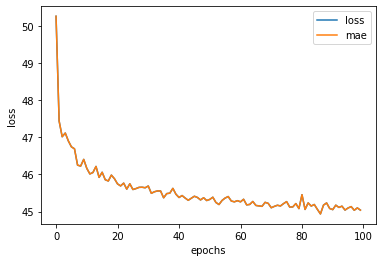

In [20]:
pd.DataFrame(energy_model1_hist.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


In [22]:
#Decent 1st model
energy_model1.save("energy_notime_or_rand")
energy_model1.save("energy_nottime_HDF5_or_rand.h5")

2021-07-11 21:34:43.034161: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: energy_notime_or_rand/assets
